In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [2]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.84178118 0.21478591 0.14811687 0.09917012 0.07991744]


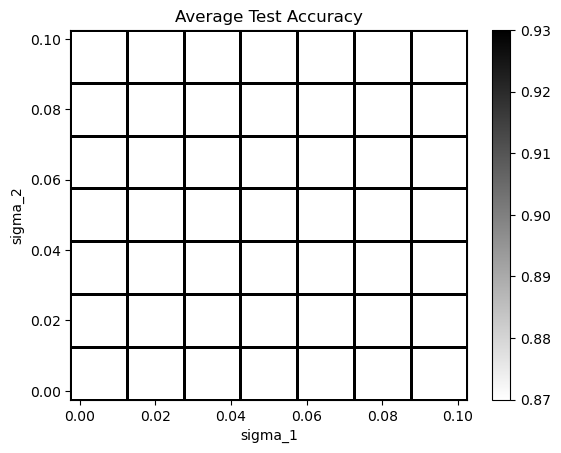

In [3]:
zeros = np.zeros((7,7))
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, zeros, cmap = 'gist_yarg', edgecolors='k', vmin=0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("zeros.png")

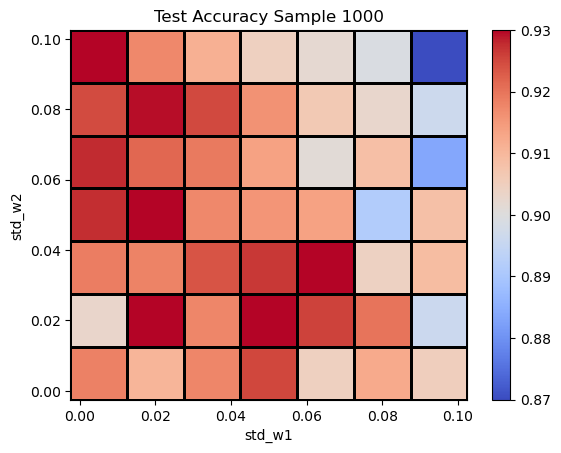

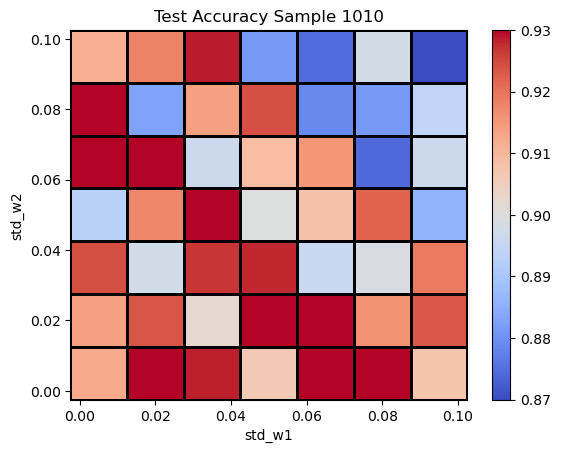

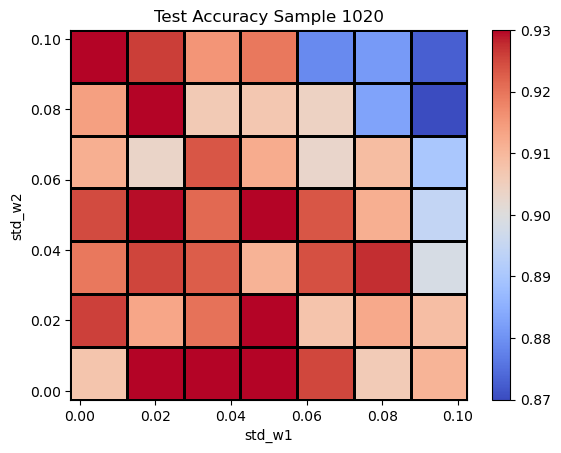

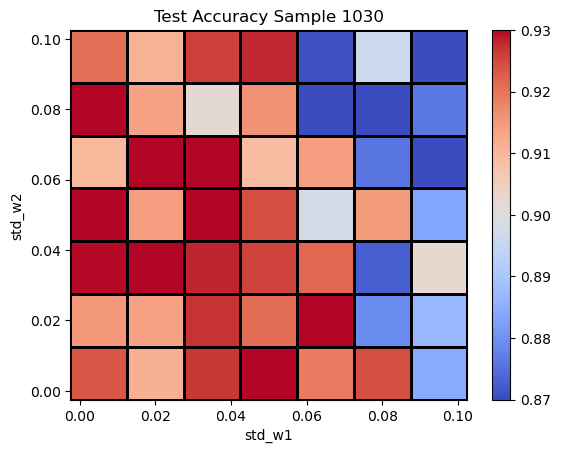

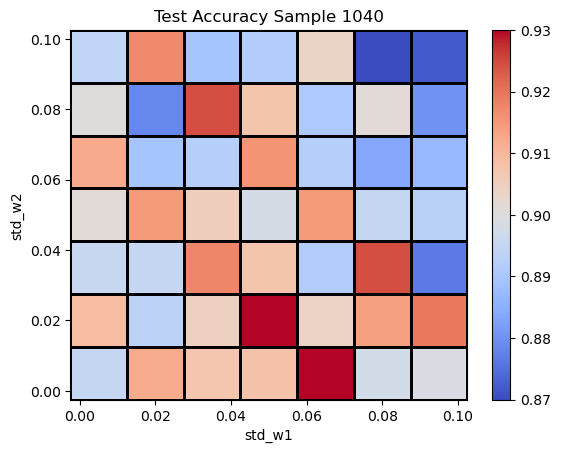

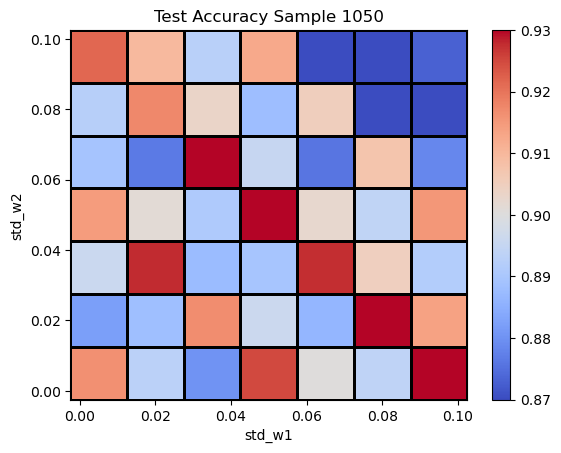

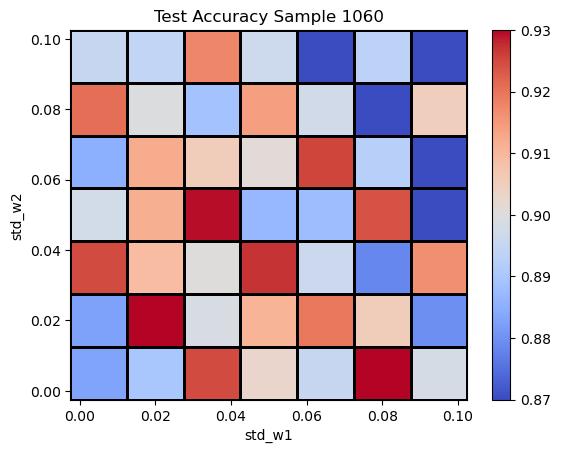

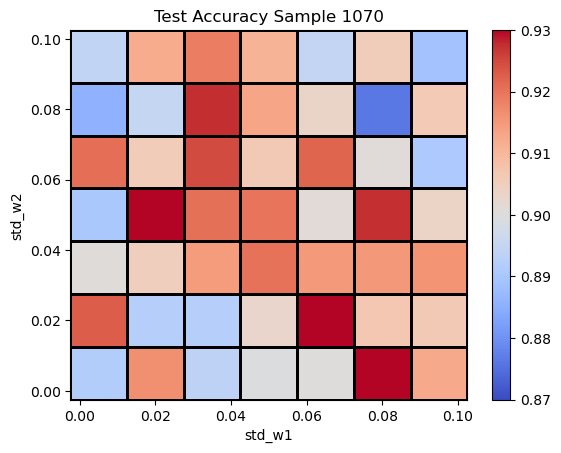

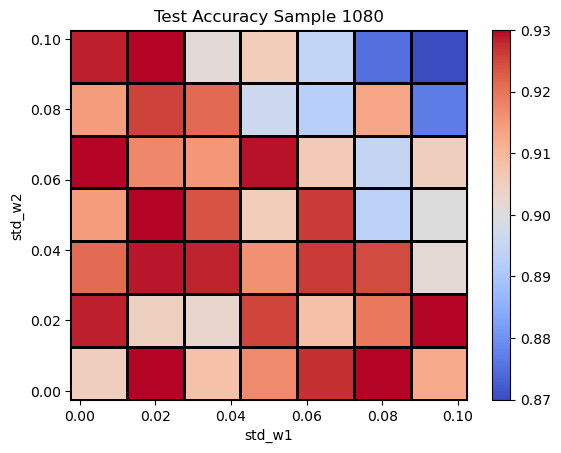

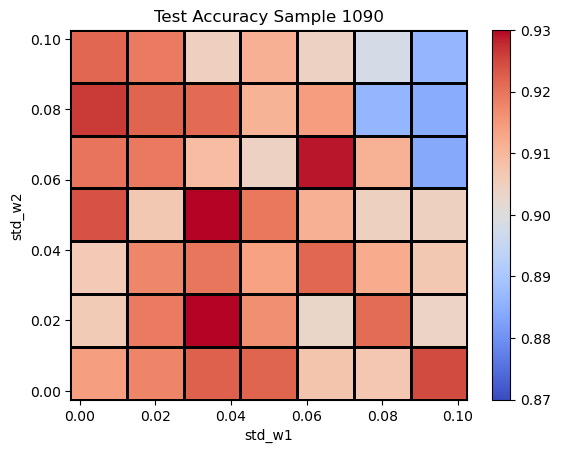

In [4]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93, edgecolors='k')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]




In [5]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [6]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [7]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90670072, 0.90889423, 0.91367188, 0.91245994, 0.91433293,
        0.9153145 , 0.91536458],
       [0.91524439, 0.91187901, 0.91632612, 0.91947115, 0.91136819,
        0.90978566, 0.91645633],
       [0.91496394, 0.91197917, 0.91698718, 0.92251603, 0.91619591,
        0.91337139, 0.91058694],
       [0.91901042, 0.92051282, 0.91656651, 0.91343149, 0.90960537,
        0.90934495, 0.90619992],
       [0.9145633 , 0.915625  , 0.91496394, 0.90871394, 0.90843349,
        0.89622396, 0.88478566],
       [0.91940104, 0.91257011, 0.90627003, 0.90780248, 0.89571314,
        0.88215144, 0.8869992 ],
       [0.90973558, 0.90707131, 0.90378606, 0.89575321, 0.88339343,
        0.88153045, 0.86791867]])

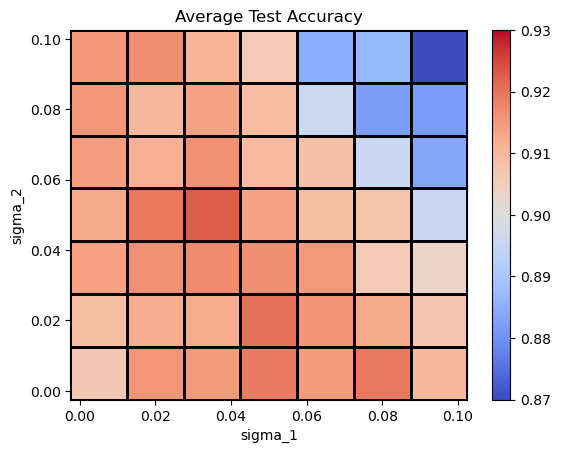

In [8]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93, edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_400_0.1.png".format(sample))

0.9225160256410257
0.8679186698717947


Text(0.5, 1.0, 'Average Test Accuracy')

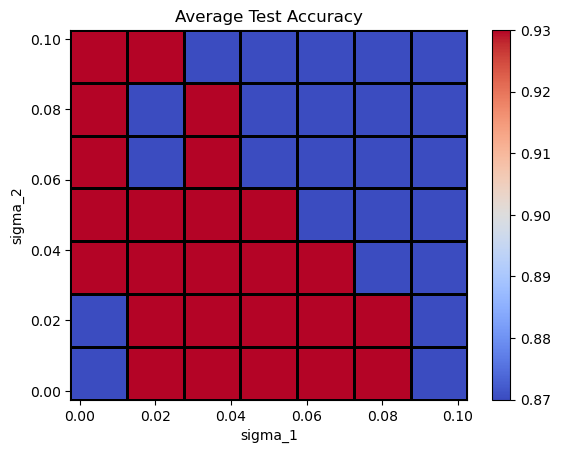

In [9]:
print(np.max(average_test_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_test_accuracy_grid_10_by_10_10_samples)
print(np.min(average_test_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_test_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.8
result_filter=average_test_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93, edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


In [10]:



# fig.savefig("average_test_accuracy_grid_400_0.1.png".format(sample))

0.9225160256410257
0.8679186698717947


Text(0.5, 1.0, 'Average Test Accuracy')

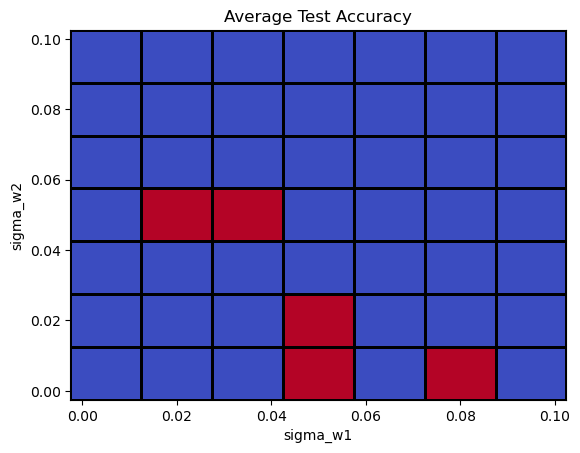

In [11]:
print(np.max(average_test_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_test_accuracy_grid_10_by_10_10_samples)
print(np.min(average_test_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_test_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.9
result_filter=average_test_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='coolwarm', edgecolors='k')
ax.set_xlabel('sigma_w1')
ax.set_ylabel('sigma_w2')
ax.set_title('Average Test Accuracy')


(0.0, 0.1)

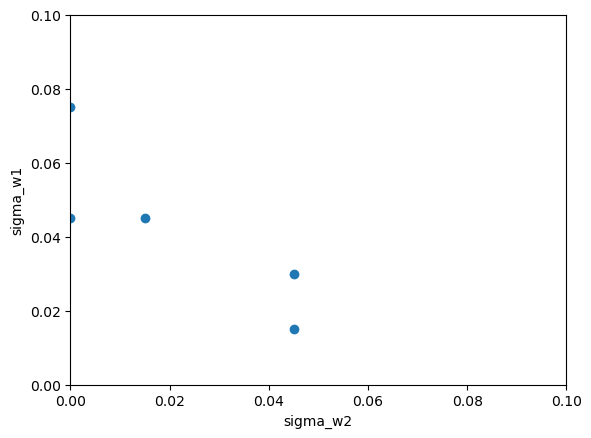

In [12]:
# get the indices where data is 1
x,y = np.argwhere(result_filter == 1).T

plt.scatter(y*0.015,x*0.015)
plt.xlabel("sigma_w2")
plt.ylabel("sigma_w1")
plt.xlim(0,0.1)
plt.ylim(0,0.1)



In [13]:
L_xx = np.sum((0.015*x)**2)-((np.sum(0.015*x))**2/x.size)

In [14]:
L_yy = np.sum((0.015*y)**2)-((np.sum(0.015*y))**2/y.size)

In [15]:
L_xy = np.sum(0.015*x*0.015*y) - ((np.sum(0.015*x))*(np.sum(0.015*y))/x.size)

In [16]:
r = L_xy/np.sqrt(L_xx*L_yy)

In [17]:
np.corrcoef(0.015*y,0.015*x)

array([[ 1.        , -0.84465303],
       [-0.84465303,  1.        ]])

In [18]:
N=[400, 400, 400, 400, 500]
corr = [-0.69337525, -0.89791825, -0.62919921, -0.84465303]